In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed/yelp_processed.csv')

In [3]:
from pathlib import Path

FIG_DIR = Path.cwd().resolve().parents[1] / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

FIG_DIR

PosixPath('/Users/darrenlam/Yelp Rating Analysis/figures')

# What do Yelp Ratings Look Like Overall?

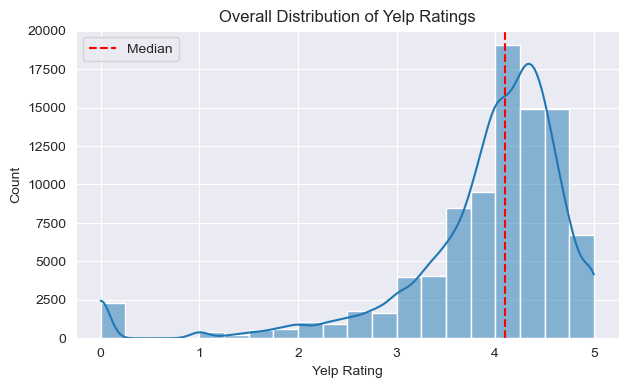

In [4]:
# Histogram
plt.figure(figsize=[7, 4])
sns.histplot(df["rating"], bins=20, kde=True)
plt.xlabel("Yelp Rating")
plt.ylabel("Count")
plt.title("Overall Distribution of Yelp Ratings")
plt.axvline(df["rating"].median(), color="red", linestyle="--", label="Median")
plt.legend()

outpath = FIG_DIR / "rating_histogram.png"
plt.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

In [5]:
# ECDF (excluded)
# plt.figure(figsize=[7, 4])
# sns.ecdfplot(df["rating"])
# plt.xlabel("Yelp Rating")
# plt.ylabel("Cumulative Distribution")
# plt.title("ECDF of Yelp Ratings")
# plt.axhline(0.5, linestyle="--", alpha=0.5)
# plt.show()

# Price Level Effect

In [6]:
# fill missing for price level
df["price_level_clean"] = df["price_level"].fillna("Missing")

/var/folders/jx/7ynp4lz12pj533x53jsk4dzr0000gn/T/ipykernel_7075/2962651688.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r"\$", r"\$\$", r"\$\$\$", r"\$\$\$\$", "Missing"])


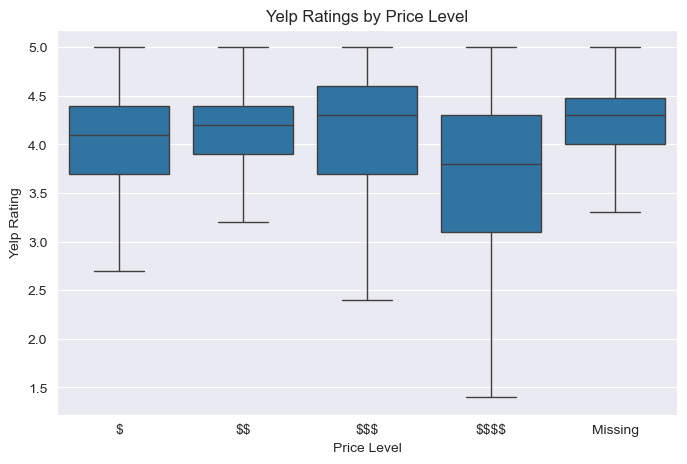

In [7]:
# boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="price_level_clean", y="rating", showfliers=False)

ax.set_xticklabels([r"\$", r"\$\$", r"\$\$\$", r"\$\$\$\$", "Missing"])
ax.set_xlabel("Price Level")
ax.set_ylabel("Yelp Rating")
ax.set_title("Yelp Ratings by Price Level")

outpath = FIG_DIR / "rating_price_boxplot.png"
plt.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# Cuisine Effect

In [8]:
# Pick top cuisines by count
top_cuisines = (
    df["cuisine_group"]
    .value_counts()
    .head(10)
    .index
)

df_top = df[df["cuisine_group"].isin(top_cuisines)]

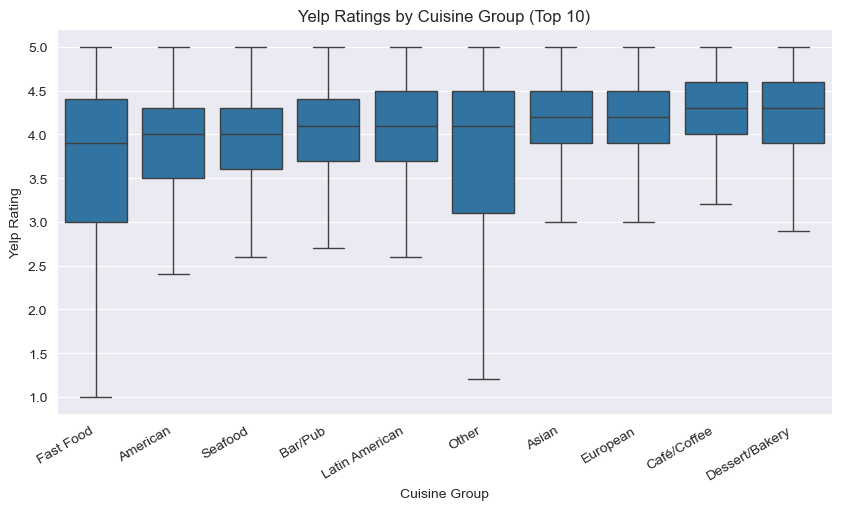

In [9]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_top,
    x="cuisine_group",
    y="rating",
    order=df_top.groupby("cuisine_group")["rating"].median().sort_values().index,
    showfliers=False
)
plt.xticks(rotation=30, ha="right")
plt.xlabel("Cuisine Group")
plt.ylabel("Yelp Rating")
plt.title("Yelp Ratings by Cuisine Group (Top 10)")

outpath = FIG_DIR / "rating_cuisine_boxplot.png"
plt.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# Cuisine x price interaction

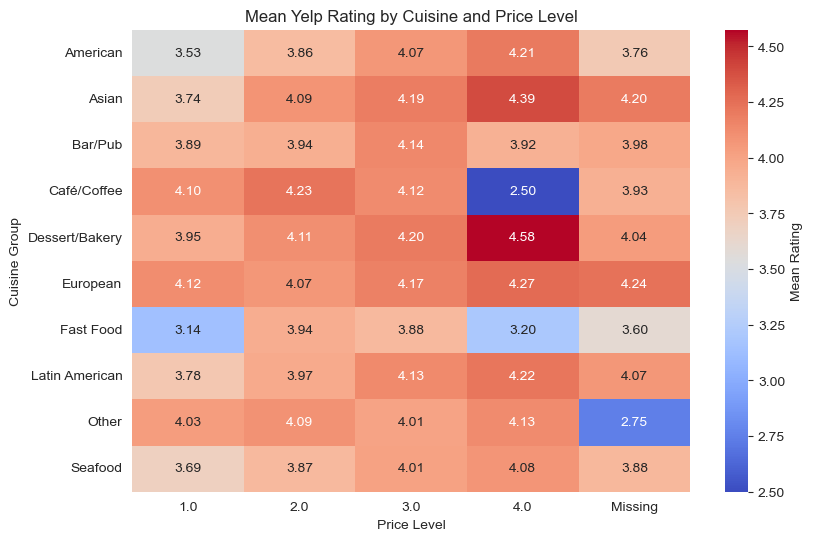

In [10]:
# Heatmap
heatmap_data = (
    df_top
    .pivot_table(
        values="rating",
        index="cuisine_group",
        columns="price_level_clean",
        aggfunc="mean"
    )
)

plt.figure(figsize=(9, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Mean Rating"}
)
plt.title("Mean Yelp Rating by Cuisine and Price Level")
plt.xlabel("Price Level")
plt.ylabel("Cuisine Group")

outpath = FIG_DIR / "cuisine_price_heatmap.png"
plt.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# City/Geography Effect

In [11]:
# Calculate rating-state summary
state_summary = (
    df.groupby("state")
      .agg(
          mean_rating=("rating", "mean"),
          n=("rating", "size")
      )
      .reset_index()
)

In [18]:
import plotly.express as px

# Map
fig = px.choropleth(
    state_summary,
    locations="state",
    locationmode="USA-states",
    color="mean_rating",
    scope="usa",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=df["rating"].mean(),
    hover_data=["n"],
    labels={"mean_rating": "Mean Rating"}
)

fig.update_layout(title_text="Mean Yelp Rating by State",
    template="plotly_white",
    paper_bgcolor="white",
    plot_bgcolor="white",
    font=dict(color="black"),
    title=dict(font=dict(color="black")),
)
fig.update_geos(bgcolor="white")
outpath = FIG_DIR / "state_rating.png"
fig.write_image(FIG_DIR / "mean_rating_by_state.png", scale=2)
plt.show()

# Review-count Bias

In [13]:
# Scatter plot (excluded)
# plt.figure(figsize=(7, 5))
# sns.scatterplot(
#     data=df,
#     x="review_count",
#     y="rating",
#     alpha=0.3
# )
# 
# plt.xscale("log")
# plt.xlabel("Review Count (log scale)")
# plt.ylabel("Yelp Rating")
# plt.title("Relationship Between Review Count and Rating")
# 
# sns.regplot(
#     data=df,
#     x="review_count",
#     y="rating",
#     scatter=False,
#     logx=True,
#     color="red"
# )
# 
# plt.show()

# Chain vs. Non-chain

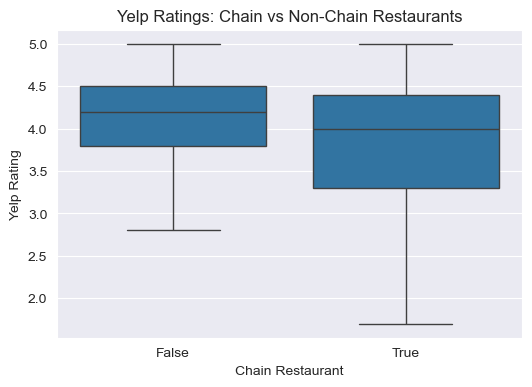

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x="is_chain",
    y="rating",
    showfliers=False
)
plt.xlabel("Chain Restaurant")
plt.ylabel("Yelp Rating")
plt.title("Yelp Ratings: Chain vs Non-Chain Restaurants")

outpath = FIG_DIR / "chain_boxplot.png"
plt.savefig(outpath, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()